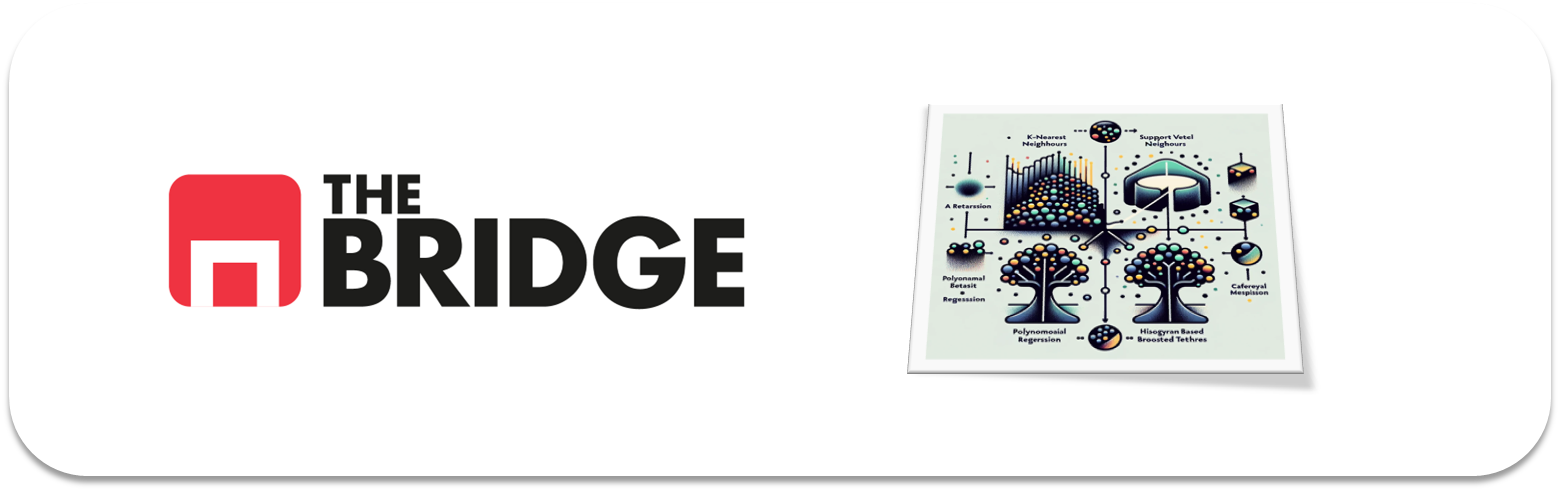

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

import ToolBox as tb

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [2]:
df_credit = pd.read_csv('./data/credit_npo.csv')

In [3]:
df_credit.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [5]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [9]:
tb.describe_df(df_credit)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
DATA_TYPE,int64,float64,int64,int64,float64,float64,int64,int64,int64,int64,float64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,5.750977,0.0,0.0,0.0,0.0,1.411821
UNIQUE_VALUES,2,10764,78,10,11547,4167,43,13,16,8,10
CARDIN (%),0.02,85.86,0.62,0.08,92.1,33.24,0.34,0.1,0.13,0.06,0.08


In [11]:
df_credit['NumberOfTime30-59DaysPastDueNotWorse'].unique()

array([ 0,  3,  1, 98,  2,  4,  5,  6,  8,  7], dtype=int64)

In [12]:
df_credit['NumberOfOpenCreditLinesAndLoans'].unique()

array([12,  9,  2,  4,  3,  5, 11,  8,  7, 13, 10,  1,  0, 14,  6, 16, 15,
       19, 18, 17, 22, 20, 23, 29, 24, 27, 21, 31, 30, 28, 38, 26, 25, 43,
       36, 34, 33, 35, 32, 48, 49, 41, 40], dtype=int64)

In [13]:

df_credit['NumberOfTimes90DaysLate'].unique()

array([ 1,  0,  3,  2, 98,  4,  6,  5,  8,  7, 10,  9, 13], dtype=int64)

In [14]:
df_credit['NumberRealEstateLoansOrLines'].unique()

array([ 0,  1,  2,  4,  3,  6,  5,  7,  8, 19, 10,  9, 11, 16, 12, 13],
      dtype=int64)

In [15]:
df_credit['NumberOfTime60-89DaysPastDueNotWorse'].unique()

array([ 0,  2, 98,  1,  3,  4,  5, 11], dtype=int64)

In [16]:
df_credit['NumberOfDependents'].unique()

array([ 0.,  2.,  3.,  1., nan,  4.,  5.,  6.,  8., 10.,  7.])

In [26]:
for col in df_credit:
    print(col)
    print(df_credit[col].describe(),'\n')

SeriousDlqin2yrs
count    12537.000000
mean         0.068916
std          0.253321
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: SeriousDlqin2yrs, dtype: float64 

RevolvingUtilizationOfUnsecuredLines
count    12537.000000
mean         0.330359
std          0.368148
min          0.000000
25%          0.030651
50%          0.163490
75%          0.582219
max          6.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64 

age
count    12537.000000
mean        52.079445
std         15.077498
min         21.000000
25%         41.000000
50%         51.000000
75%         62.000000
max        101.000000
Name: age, dtype: float64 

NumberOfTime30-59DaysPastDueNotWorse
count    12537.000000
mean         0.409588
std          4.055787
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         98.000000
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: float64 

DebtRatio


## Descripción de las variables:

- SeriousDlqin2yrs: Morosidad grave en 2 años (Binaria)

- RevolvingUtilizationOfUnsecuredLines: Utilización de líneas de crédito sin garantía (Numérica continua)

- age: Edad (Numérica continua)

- NumberOfTime30-59DaysPastDueNotWorse: Veces con retraso 30-59 días (Numérica discreta)

- DebtRatio: Ratio de deuda (Numérica continua)

- MonthlyIncome: Ingreso mensual (Numérica continua)

- NumberOfOpenCreditLinesAndLoans: Créditos y préstamos abiertos (Numérica discreta)

- NumberOfTimes90DaysLate: Veces con retraso 90 días (Numérica discreta)

- NumberRealEstateLoansOrLines: Préstamos o líneas inmobiliarias (Numérica discreta)

- NumberOfTime60-89DaysPastDueNotWorse: Veces con retraso 60-89 días (Numérica discreta)

- NumberOfDependents: Número de dependientes (Numérica discreta)

### #1.2 ¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

Estamos tratando un **problema de clasificación binaria**. La tarea consiste en predecir si una persona se encontrará en dificultades financieras graves en los próximos dos años, lo cual se refleja en la variable objetivo.

#### Variable target:
La variable target es **`SeriousDlqin2yrs`**, que indica si una persona ha experimentado un serio incumplimiento de pago (delinquency) en los últimos dos años. Esta variable es binaria, donde:
- `0` indica que la persona no ha experimentado serias dificultades financieras.
- `1` indica que la persona ha experimentado serias dificultades financieras.

### #1.3
Pinta la distribución de frecuencias del target y coméntala

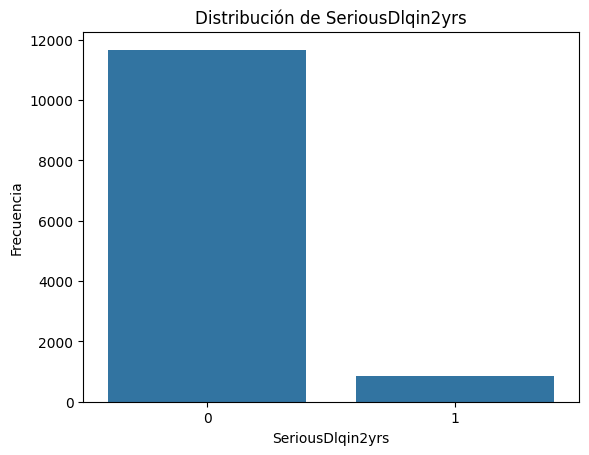

In [28]:
sns.countplot(x='SeriousDlqin2yrs', data=df_credit)
plt.title('Distribución de SeriousDlqin2yrs')
plt.xlabel('SeriousDlqin2yrs')
plt.ylabel('Frecuencia')
plt.show()

- La mayoría de los valores son `0`, indicando que la mayoría de las personas en el dataset no han experimentado serias dificultades financieras en los últimos dos años.
- Una pequeña proporción de los valores son `1`, indicando que un número menor de personas sí han tenido serias dificultades financieras.

Esto sugiere un **desbalanceo de clases** en los datos. El desbalanceo de clases puede afectar el rendimiento de los modelos de clasificación; por ello, consideraré técnicas de balanceo, como SMOTE, para manejar este desbalance al entrenar los modelos.

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

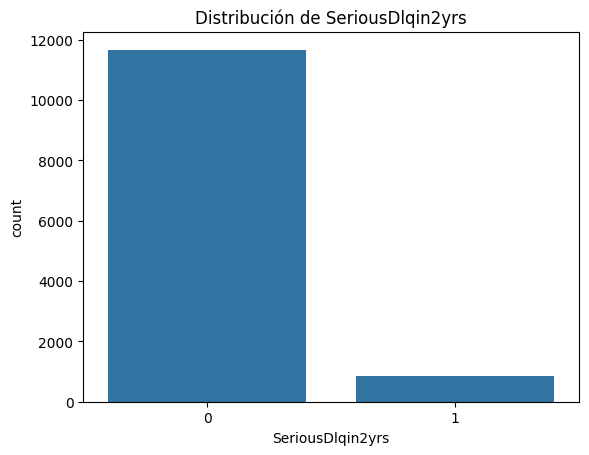

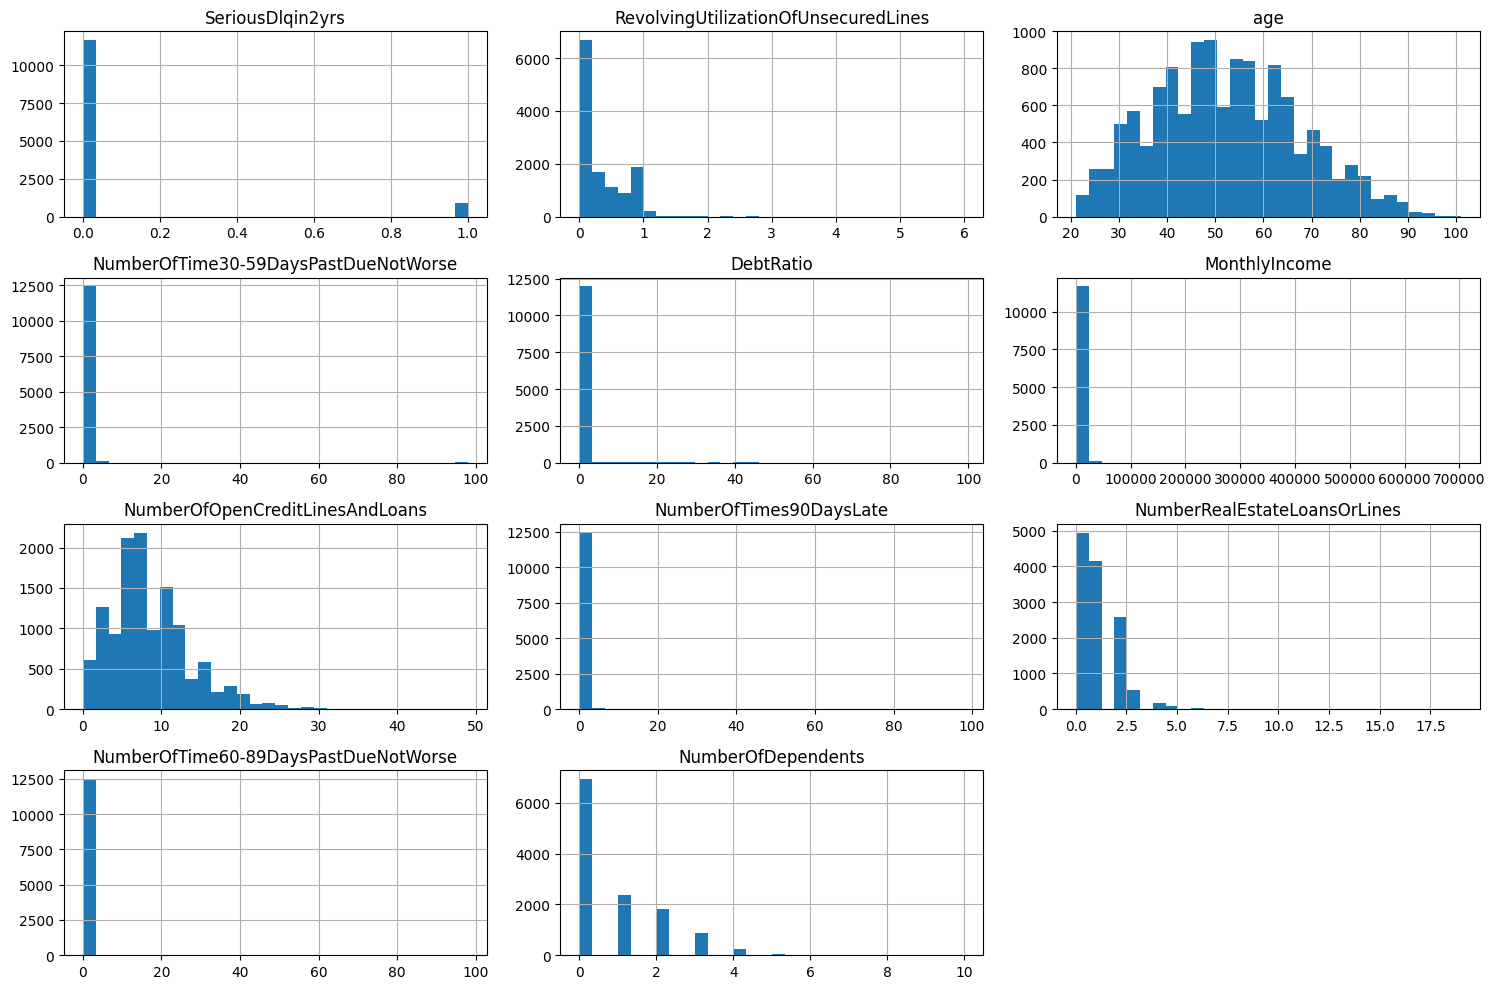

In [29]:
# Visualización de las distribuciones de las variables
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de la variable objetivo
sns.countplot(x='SeriousDlqin2yrs', data=df_credit)
plt.title('Distribución de SeriousDlqin2yrs')
plt.show()

# Distribución de variables numéricas
df_credit.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

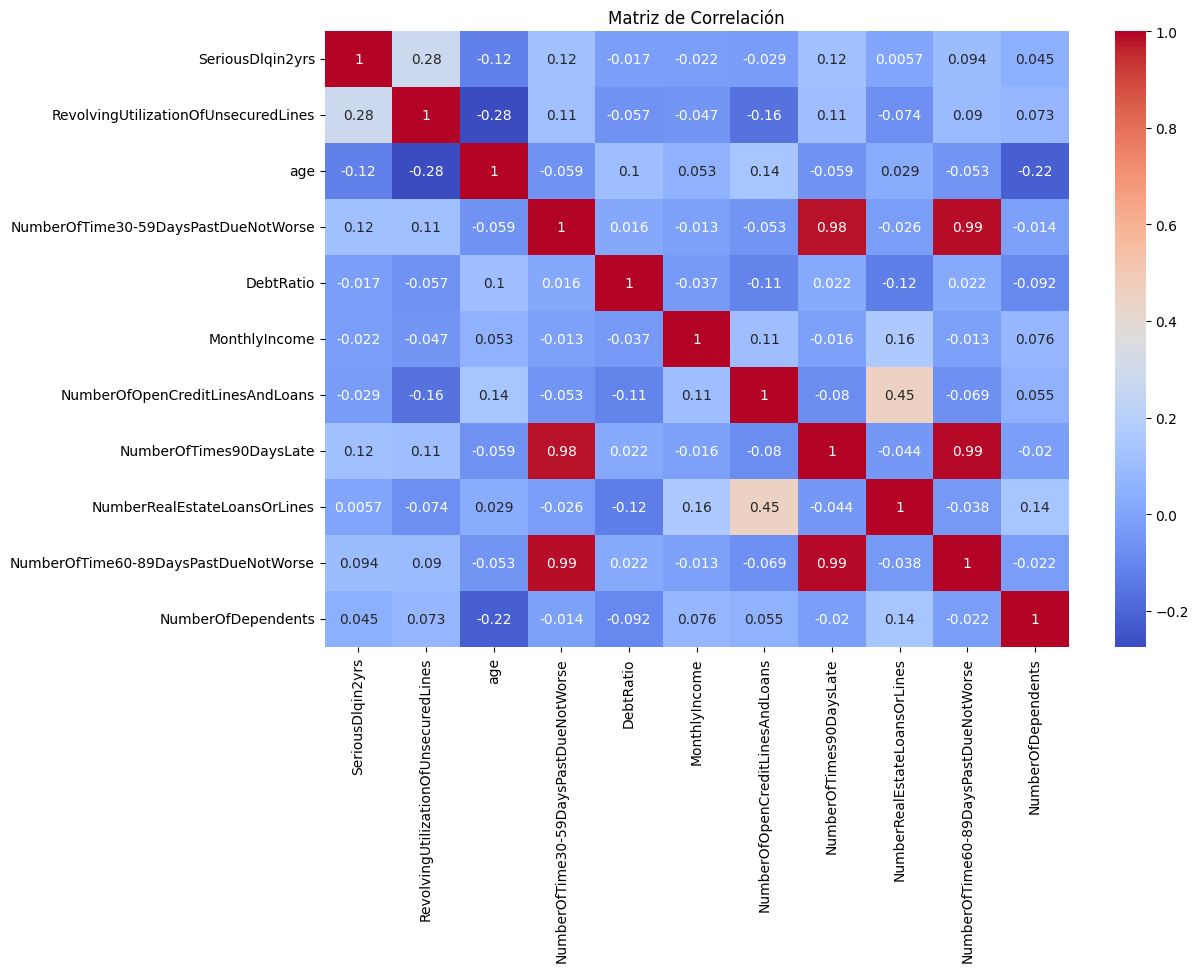

In [30]:
# Matriz de correlación
correlation_matrix = df_credit.corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [31]:
#Valores nulos:
df_credit['MonthlyIncome'].fillna(df_credit['MonthlyIncome'].median(), inplace=True)
df_credit['NumberOfDependents'].fillna(df_credit['NumberOfDependents'].median(), inplace=True)

# Verificar si hay valores nulos restantes
print(df_credit.isnull().sum())

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


C:\Users\aritz\AppData\Local\Temp\ipykernel_24500\241641398.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_credit['MonthlyIncome'].fillna(df_credit['MonthlyIncome'].median(), inplace=True)


In [32]:
# Normalización de variables numéricas
scaler = StandardScaler()
num_vars = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 
            'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 
            'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 
            'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']

df_credit[num_vars] = scaler.fit_transform(df_credit[num_vars])

In [33]:
# División de datos en entrenamiento y prueba
X = df_credit.drop('SeriousDlqin2yrs', axis=1)
y = df_credit['SeriousDlqin2yrs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
print(X_train.shape, X_test.shape)


(8775, 10) (3762, 10)


In [40]:
X_train.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
7914,-0.783989,-0.005269,-0.100992,-0.200603,-0.154719,-1.061395,-0.064258,-0.880913,-0.056825,1.932731
157,-0.833567,-0.270576,-0.100992,-0.195410,0.120241,0.681030,-0.064258,0.882320,-0.056825,0.167292
4237,-0.857482,1.321264,-0.100992,8.013476,-0.588958,0.874633,-0.064258,-0.880913,-0.056825,-0.715427
127,-0.623751,-1.000169,-0.100992,-0.162612,0.315649,2.229852,-0.064258,0.882320,-0.056825,-0.715427
5861,-0.437663,-0.270576,-0.100992,-0.184288,0.243305,0.100222,-0.064258,0.000703,-0.056825,-0.715427


In [42]:
y_train.value_counts()

SeriousDlqin2yrs
0    8154
1     621
Name: count, dtype: int64

In [55]:
# Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(y_train_balanced.value_counts())

SeriousDlqin2yrs
0    8154
1    8154
Name: count, dtype: int64


# Modelos a aplicar:
 1. KNN
 2. Regresión Logística
 3. Random Forest

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.74      0.84      3519
           1       0.15      0.67      0.25       243

    accuracy                           0.74      3762
   macro avg       0.56      0.71      0.55      3762
weighted avg       0.92      0.74      0.80      3762

KNN Confusion Matrix:
[[2620  899]
 [  81  162]]


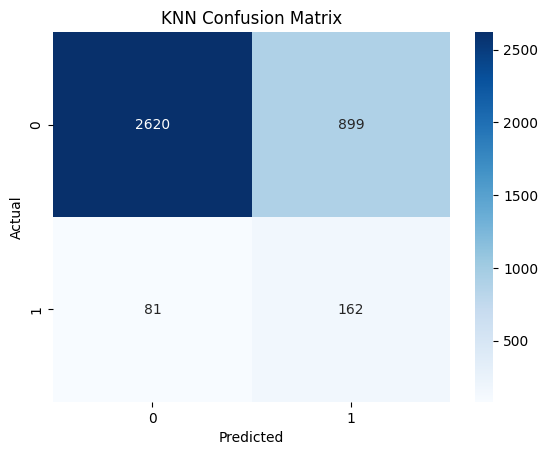

In [58]:
# Evaluar el modelo KNN en el conjunto de prueba
knn = KNeighborsClassifier(n_neighbors=100)
# Entrenar el modelo KNN
knn.fit(X_train_balanced, y_train_balanced)

# Hacer predicciones en el conjunto de prueba
y_pred_knn = knn.predict(X_test)

# Evaluar el modelo KNN en el conjunto de prueba
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Matriz de confusión del modelo KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("KNN Confusion Matrix:")
print(conf_matrix_knn)

sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.76      0.86      3519
           1       0.18      0.74      0.28       243

    accuracy                           0.76      3762
   macro avg       0.58      0.75      0.57      3762
weighted avg       0.93      0.76      0.82      3762

Logistic Regression Confusion Matrix:
[[2675  844]
 [  63  180]]


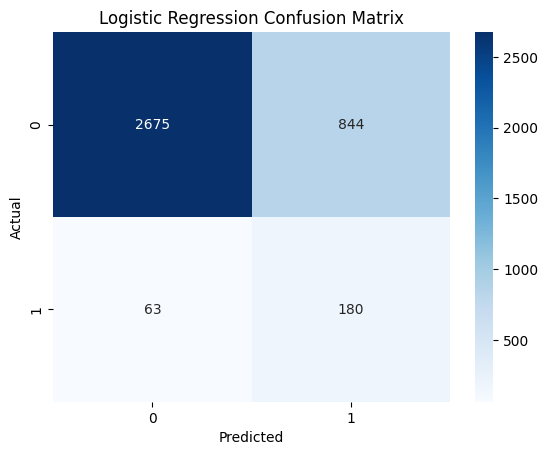

In [59]:
log_reg = LogisticRegression(max_iter=1000)

# Entrenar el modelo de Regresión Logística
log_reg.fit(X_train_balanced, y_train_balanced)

# Hacer predicciones en el conjunto de prueba
y_pred_log_reg = log_reg.predict(X_test)

# Evaluar el modelo de Regresión Logística en el conjunto de prueba
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Matriz de confusión del modelo de Regresión Logística
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Logistic Regression Confusion Matrix:")
print(conf_matrix_log_reg)

sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3519
           1       0.36      0.31      0.33       243

    accuracy                           0.92      3762
   macro avg       0.66      0.64      0.65      3762
weighted avg       0.91      0.92      0.92      3762

Random Forest Confusion Matrix:
[[3384  135]
 [ 167   76]]


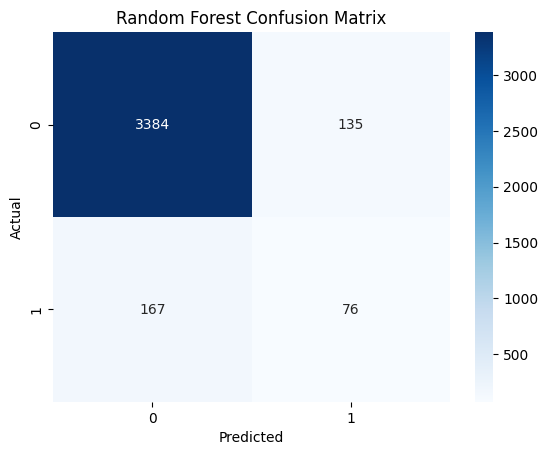

In [60]:
rf = RandomForestClassifier(random_state=42)
# Entrenar el modelo de Regresión Logística
rf.fit(X_train_balanced, y_train_balanced)

# Hacer predicciones en el conjunto de prueba
y_pred_rf = rf.predict(X_test)

# Evaluar el modelo de Regresión Logística en el conjunto de prueba
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Matriz de confusión del modelo de Regresión Logística
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)

sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [62]:
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print()
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print()
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.74      0.84      3519
           1       0.15      0.67      0.25       243

    accuracy                           0.74      3762
   macro avg       0.56      0.71      0.55      3762
weighted avg       0.92      0.74      0.80      3762


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.76      0.86      3519
           1       0.18      0.74      0.28       243

    accuracy                           0.76      3762
   macro avg       0.58      0.75      0.57      3762
weighted avg       0.93      0.76      0.82      3762


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3519
           1       0.36      0.31      0.33       243

    accuracy                           0.92      3762
   macro avg       

In [63]:
# Evaluar cada modelo utilizando validación cruzada
for name, model in zip(['KNN', 'Logistic Regression', 'Random Forest'], [knn, log_reg, rf]):
    scores = cross_val_score(model, X_train_balanced, y_train_balanced, cv=5, scoring='recall')
    print(f'{name} Recall (CV): {scores.mean():.4f} (+/- {scores.std():.4f})')

KNN Recall (CV): 0.8217 (+/- 0.0082)
Logistic Regression Recall (CV): 0.7551 (+/- 0.0098)
Random Forest Recall (CV): 0.9507 (+/- 0.0505)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3519
           1       0.36      0.32      0.34       243

    accuracy                           0.92      3762
   macro avg       0.66      0.64      0.65      3762
weighted avg       0.91      0.92      0.92      3762

Best Random Forest Confusion Matrix:
[[3379  140]
 [ 165   78]]


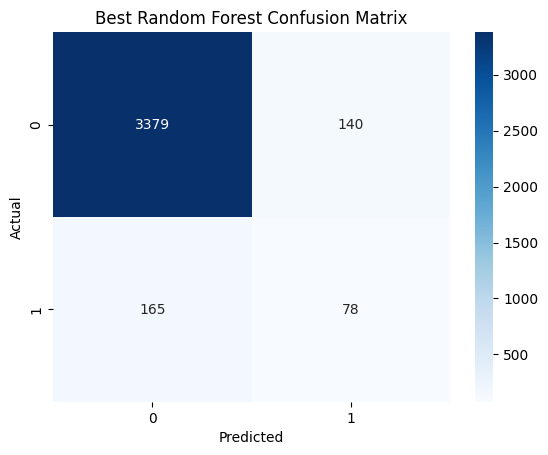

In [64]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instanciar el modelo
rf = RandomForestClassifier(random_state=42)

# Definir la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=2)

# Ajustar el modelo a los datos
grid_search.fit(X_train_balanced, y_train_balanced)

# Mejor estimador y sus hiperparámetros
best_rf = grid_search.best_estimator_
print(grid_search.best_params_)

# Evaluar el mejor modelo en el conjunto de prueba
y_pred_best_rf = best_rf.predict(X_test)

# Reporte de clasificación
print("Best Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best_rf))

# Matriz de confusión
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)
print("Best Random Forest Confusion Matrix:")
print(conf_matrix_best_rf)

sns.heatmap(conf_matrix_best_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Best Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [65]:
print("Best Random Forest sin ajustar:")
print(classification_report(y_test, y_pred_rf))

Best Random Forest sin ajustar:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3519
           1       0.36      0.31      0.33       243

    accuracy                           0.92      3762
   macro avg       0.66      0.64      0.65      3762
weighted avg       0.91      0.92      0.92      3762



In [66]:
print("Best Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best_rf))

Best Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3519
           1       0.36      0.32      0.34       243

    accuracy                           0.92      3762
   macro avg       0.66      0.64      0.65      3762
weighted avg       0.91      0.92      0.92      3762



### Conclusión: 
No parece que haber ajustado los hiperparámetros haya mejorado demasiado el modelo